# Optimization
<a name="optimization"></a>

## Overview, Objectives, and Key Terms
 
In [Root Finding](#root_finding), the bisection method and Newton's method were used to solve nonlinear equations.  Now, those methods (and tools like `fsolve`) are used to solve **optimization problems**. The subject is rich, so we'll touch on only the basics, but you'll have tools at your disposal to tackle such problems in varied applications.
 
### Objectives

By the end of this lesson, you should be able to

- Find local extrema of a function $f(x)$ using the bisection and Newton methods.
- Use `minimize` to solve nonlinear optimization problems.

### Key Terms

- optimization
- uncontrained optimization
- constrained optimization
- extremum
- critical point
- objective function
- linear program
- `scipy.optimize.minimize`
- `scipy.optimize.linprog`

## Some Nomenclature

Optimization problems often defined by minimizing an **objective function**

$$
  \min_{x} f(x) \qquad \text{or} \qquad \min_{\mathbf{x}} f(\mathbf{x}) \, ,
$$

subject to the **inequality constraints**

$$
  g(x) \ge 0 \qquad \text{or} \qquad \mathbf{g(x)}  \ge \mathbf{0} \, ,
$$

and/or the **equality constraints**

$$
  h(x) = 0 \qquad \text{or} \qquad \mathbf{h(x)} = \mathbf{0} \, .
$$

An optimization problem is *unconstrained* if it is subject to no inequality constraints and no equality constraints.  Otherwise, the problem is *constrained*.  In practice, unconstrained problems are often easier to solve using a variety of techniques for finding *extrema*.  We'll start with unconstrained problems and then consider an important class of constrained problems known as *linear programs*.

## Finding Extrema

One of the great applications of differentiation is its ability
to identify the *critical points* of a function $f(x)$, which
include its *minima* and *maxima*, i.e., its *extrema*.  Suppose
$f(x)$ represents some quantity of interest, perhaps the cost 
of materials for some component or the signal-to-noise ratio of
some sensor.  If we want to mininimize those costs or maximize those
ratios, we need to use *optimization*.  Although optimization problems
and the techniques to solve them are quite diverse, we will stick to
1-D problems in which the *objective function* to be minimized or 
maximized is continuous (as opposed to discrete).

You've had calculus (and we've reviewed some its topics).  Hence, you might recall that a function $f(x)$ exhibits an **extremum**, i.e., a **minimum** or **maximum**, at any point $x$ for which $f'(x)$ is zero and $f''(x)$ is nonzero.  When $f'(x)$ *and* $f''(x)$ vanish, the point is often called a **saddle point**, though that term is more meaningful in multiple dimensions.

***

**Exercise**: Given some fencing of *fixed* length `L`, what is the largest area that fencing can enclose if arranged in a rectangle  of sides `a` and  `b`?  

*Solution*:

Here's the problem.  We want to maximize $A = ab$ where $2a+2b = L$ or $b = L/2 - a$.  We know $L$ and $b$ depends on $a$, so there is just one free parameter (i.e., we're in 1-D where we'll stay throughout).  Note that $a$ (and $b$) can range from 0 to $L/2$.

Formally, we see a solution to

$$
  \max_{a \in [0,\, L/2]} a\left (\frac{L}{2}-a \right)
$$

which reads "find the value of $a$ in the range $[0, L/2]$ that maximizes the quantity $f(a) = a(L/2-a)$.  Here, $f(a)$ is the **objective function**.

Differentiation of $f(a)$ gives

$$
  f'(a) = L/2 - 2a 
$$

which, when set to zero, requires that $a = L/4$.  Consequently, $b = L/2-a = L/4 = a$.  That is to say, our fence must form a square to maximize the area enclosed.

***

## The Connection To Nonlinear Functions


As the fence exercise illustrates, if we can write down the derivative and explicitly find the point at which it vanishes, our problem is solved.  That is rarely the case.  Often, the functions of interest have complicated derivatives that make $f'(x) = 0$ a nonlinear equation.  We generally can't solve that problem directly. In many cases, we don't even have $f'(x)$, and at best, we can approximate it numerically using finite differences.  

Further complicating matters is that even if we can solve  $f'(x)=0$, the result might not be an extremum (consider $f(x)=x^3$ and the  zeros of its derivative $3x^2$), and it might not be unique. 

Consider the following example (for $f(x) = \sin(x^22)-3)^2$): 

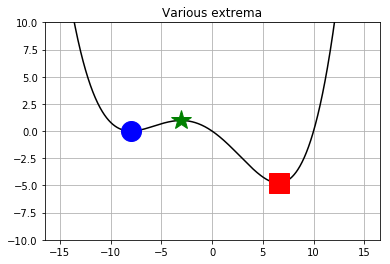

In [1]:
import matplotlib
%matplotlib inline
import nonlinear_plots
nonlinear_plots.extrema()

Of the three roots, two correspond to minima---but the left one (blue circle) is greater than the right one (red square), so is it really a minimum?  *Yes*, if we make the distinction between *local* and *global* minima.  For this problem, the right minimum is the *global* minimum, while the central root (green star) represents a local maximum ($f(x)$ is *unbounded*, i.e.,  there is no value $M < \infty$ such that $|f(x)| < M$ for all possible values of $x$).  Given the choice,  a global optimum is usualy preferred, but for many cases, we're at best guaranteed a local minimum.  There are techniques to increase our  chances of finding a global optimum, but that's outside the present scope!

## Solving Unconstrained Optimization Problems


### When the Derivative is Available

If we have $f(x)$ and can evaluate $f'(x)$, then either Newton's method or the secant method can be applied to $f'(x) = 0$.  The same goes for multi-variable problems, where the gradient $\nabla f(\mathbf{x})$ replaces $f'(x)$, and the *hessian* matrix $\mathbf{H}(\mathbf{x})$ replaces $f''(x)$.

***

**Exercise**: Find the value of $x$ that maximizes the function $f(x) = 2\sin(x) - x^2/10$ starting with $x_0 = 2.5$.  Then, confirm your result by showing it on a graph of $f(x)$.

*Solution*.  We can immediately differentiate $f(x)$ to find $f'(x) = 2\cos(x) + x/5$ and $f''(x) = -2\sin(x) + 1/5$. Then, Newton's method gives

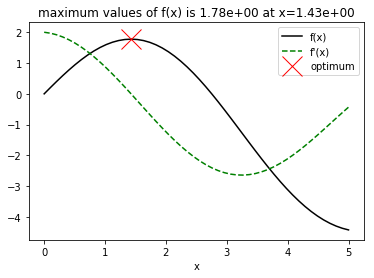

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda z: 2*np.sin(z) - z**2/10 # objective function
fp = lambda z: 2*np.cos(z) - z/5    
fpp = lambda z: -2*np.sin(z) - 1/5  

x = 2.5 # initial guess
while abs(fp(x)) > 1e-12:
    x = x - fp(x)/fpp(x)

x_vals = np.linspace(0, 5)
plt.plot(x_vals, f(x_vals), 'k', label='f(x)')
plt.plot(x_vals, fp(x_vals), 'g--', label="f'(x)")
plt.plot(x, f(x), 'rx', ms='20', label='optimum') # X marks the spot...
plt.xlabel('x')
plt.title('maximum values of f(x) is {:.2e} at x={:.2e}'.format(f(x), x))
plt.legend()


***

**Exercise**: Consider the objective function $f(\mathbf{x}) = ax_0 + bx_1 - (2x_0^2 + x_0 x_1 + 2x_1^2)$.  Compute $\nabla f(\mathbf{x})$ and $\mathbf{H}(\mathbf{x})$ (which is the jacobian of $\mathbf{\nabla g}(x)$.  Then, for $a = 5$ and $b = 10$, determine the values of $x_0$ and $x_1$ that maximize $f(\mathbf{x})$ starting with $\mathbf{x} = [1, 2]^T$.

*Solution*:

The gradient is

$$
\nabla f(\mathbf{x}) = 
\left [ \begin{array}{c}
  \partial f / \partial x_0 \\
  \partial f / \partial x_1 
\end{array} \right ] =
\left [ \begin{array}{c}
   a - 4 x_0 - x_1 \\
   b - 4 x_1 - x_0
\end{array} \right ] \, .
$$

The hessian matrix is the jacobian matrix for $\mathbf{\nabla f}(\mathbf{x})$, or
$$
\mathbf{H}(\mathbf{x}) =
\left [ \begin{array}{cc}
  \partial \nabla f_0 / \partial x_0 & \partial \nabla f_0 / \partial x_1 \\
  \partial \nabla f_1 / \partial x_0 & \partial \nabla f_1 / \partial x_1 \\
\end{array} \right ] =
\left [ \begin{array}{c}
   -4 & -1 \\
   -1 & -4
\end{array} \right ] \, .
$$

Now, apply Newton's method:

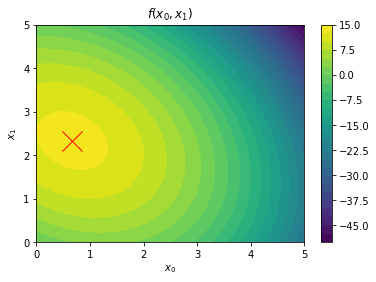

In [3]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda z: 5*z[0] + 10*z[1] - (2*z[0]**2 + z[0]*z[1] + 2*z[1]**2)
gf = lambda z: np.array([5-4*x[0]-x[1], 
                        10-4*x[1]-x[0]]) # gradient of f
H = np.array([[-4.0, -1.0],
              [-1.0, -4.0]])  

# Apply Newton's method
x = np.array([1.0, 2.0])
while sum(abs(gf(x))) > 1e-8:
    x = x - np.linalg.solve(H, gf(x))
    
# Plot the results and show where the maximum exists
x0, x1 = np.linspace(0, 5), np.linspace(0, 5)
x0, x1 = np.meshgrid(x0, x1)
plt.contourf(x0, x1, f([x0, x1]), 25)
plt.colorbar()
plt.plot(x[0], x[1], 'rx', ms=20)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('$f(x_0, x_1)$');

### When the Derivative is Unavailable

If we have $f'(x)$, we can apply Newton's method to $f'(x) = 0$.  Assuming we don't, how can we proceed?  One option is to adapt the bisection method.  Now, the search is not based on the change of the sign of $f(x)$ but rather it's magnitude relative to the left and right points.  Again, we have to have isolated our (single) target value in some finite range, which may be no easy task (plotting helps).   Alternatively, Newton-like methods can be used by approximating both $f'(x)$ and $f''(x)$ (or their multi-dimensional analogs) with finite differences.

### Using `scipy.optimize.minimize`

An alternative to Newton's method is the `minimize` function in `scipy.optimize`. From `help(minimize)`, we find

```
Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), 
         tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
```

At a minimum, one must define (1) the function `fun` to minimize, and (2) an initial guess `x0` for the solution.  The function minimize returns an *object* with several attributes, one of which is the solution `x`.  Therefore, if one calls `sol = minimize(fun, x0)`, the solution is `sol.x`.

***

**Exercise**: Use `minimize` to find the *maximum* of $f(x) = 2\sin(x) - x^2/10$ starting with $x_0 = 2.5$.  

**Solution**: Note that any maximization problem can be turned into a minimization problem negating the objective function, i.e., $f(x)$ becomes $-f(x)$.  Then:

In [4]:
import numpy as np
from scipy.optimize import minimize
f = lambda x: -2*np.sin(x) + x**2 / 10
sol = minimize(f, x0=2.5)
print(sol.x) 

[1.42755179]


***



**Example**: Use `minimize` to find $\mathbf{x} = [x_0, x_1]^T$ that minimizes $f(x) =x_0^2 - x_0 - 2 x_1 - x_0 x_1 + x_1^2$.  Use an initial guess of $x_0 = x_1 = 0$.

**Solution**:

In [5]:
f = lambda x: x[0]**2 - x[0] -2*x[1] - x[0]*x[1] + x[1]**2
x_initial = [0.0, 0.0]
sol = minimize(f, x0=x_initial)
print(sol.x)

[1.33333353 1.66666666]


## Solving Constrained Optimization Problems

Optimization with constraints is a much more challenging problem.  Although `minimize` can be used for such problems, we limit our focus to a specific class of constrained optimization problems known as [linear programs](https://en.wikipedia.org/wiki/Linear_programming).  The standard form of a linear program is

$$
  \min_{\mathbf{x}} \mathbf{c}^T \mathbf{x}\, ,
$$

subject to 

$$
  \mathbf{A}_{ub}\mathbf{x} \le \mathbf{b}_{ub} \, ,
$$

and 

$$
  \mathbf{A}_{eq}\mathbf{x} = \mathbf{b}_{eq} \, .
$$

Note, the objective function is *linear*, and $\mathbf{c}$ represents a vector of costs associated with each element of $\mathbf{x}$.  


The ideal tool for solving such problems is `scipy.optimize.linprog`, for which help provides

```
linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form::
    
        Minimize:     c^T * x
    
        Subject to:   A_ub * x <= b_ub
                      A_eq * x == b_eq
```

Here, `A_ub` and `A_eq` are two-dimensional arrays, while `c`, `b_ub`, and `b_eq` are one-dimensional arrays. 

***

**Exercise**.  Use `linprog` to find $\mathbf{x} = [x_0, x_1]^T$ that *maximizes* $x_0 + x_1$ subject to the constraints

$$
x_0 \ge 0 \\
x_1 \ge 0 \\
x_0 + 2 x_1 \leq 4 \\
4 x_0 + 2 x_1 \leq 12 \\
-x_0 +  x_1 \leq 1 \\
$$

*Solution*:  Note first that the cost vector $\mathbf{c}$ should be $[-1, -1]^T$ so that the sum of $x_0$ and $x_1$ is *maximized*.  All of the inequality constraints can be cast in $\mathbf{A}_{ub} \mathbf{x} \le \mathbf{b}_{ub}$ form by noting that if $x_0 \ge 0$ then $-x_0 \le 0$.  Therefore, these constraints can be written as

$$
\left [ \begin{array}{cc}
-1 & 0 \\
 0 & -1 \\
 1 & 2 \\
 4 & 2 \\
-1 & 1
\end{array} \right] 
\left [ \begin{array}{cc}
x_0 \\
x_1 
\end{array} \right] \leq
\left [ \begin{array}{c}
 0 \\
 0 \\
 4 \\
12 \\
1 
\end{array} \right] 
$$

Finally, there are no equality constraints.  From here, `linprog` can be used via 

In [6]:
from scipy.optimize import linprog
import numpy as np
c = np.array([-1, -1])
A_ub = np.array([[-1.0, 0.0],
                 [0.0, -1.0],
                 [1.0, 2.0],
                 [4.0, 2.0],
                 [-1.0, 1.0]])
b_ub = np.array([0, 0, 4, 12, 1])
sol=linprog(c, A_ub, b_ub)
print(sol.x) # like minimize, linprog returns an object 
             # with attribute x

[2.66666667 0.66666667]



***




**Exercise**.  Suppose the Acme Concrete Company is supplying concrete for three large-scale projects.  The company has production facilities in four different locations.  Projects 0, 1, and 2 require 250, 400, and 500 cubic meters of concrete each week.  Plants A, B, C, and D produce 350, 200, 400, and 450 cubic meters each week. Although the plants, in total, produce more than enough to supply all three projects, the cost to provide the concrete depends on the distance traveled between the plant and the project. The cost per cubic meter to ship from any plant to any project is summarized n the table below:

|    | 0  | 1  | 2 |
|----|---|---|
| **A**  | 10  | 20 | 30  |
| **B**  | 15  |  5 | 20  |
| **C**  | 25 |  20  |15  |
| **D**  | 30  | 10  | 20 |

How much should each plant supply to each project?  Convert this problem into a linear program, and then use `linprog` to determine the solution.

***


## Further Reading

Checkout out the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html) on optimization and root finding.